In [376]:
from time import *
from sklearn import tree
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import time
import numpy as np
start_time = time.time()
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import quandl 
import seaborn as sns 

In [377]:
def algo(t):

    features = []
    labels = []

    for i in range(len(t) - acc + 1):
        features.append(t[-1*acc:-1])

        #1 means price went up
        if t[-1] > t[-2]:
            labels.append(1)
        else:
            labels.append(0)
            
    clf = tree.DecisionTreeClassifier()
    clf.fit(features, labels)

    if clf.predict(t[-1*acc+1:])[0] == 1:
        return 1
    else:
        return 0

In [378]:
acc = 10
Points = []
dates = []
CashRecords = []

Cash = 100
Bought = False
days = 0
decision = 0
stockSymbol = 'AAPL'

style.use('ggplot')
start = dt.datetime(2015,1,1)
end = dt.datetime(2016,12,31)



In [379]:
#import data from quandl 
data = quandl.get("WIKI/GOOGL")

In [380]:
nvda = quandl.get("WIKI/NVDA")

In [381]:
SP500 = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH")

In [382]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1771 entries, 1871-01-01 to 2018-07-01
Data columns (total 1 columns):
Value    1771 non-null float64
dtypes: float64(1)
memory usage: 27.7 KB


In [383]:
nvda.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,4825.000000,4825.000000,4825.000000,4825.000000,4.825000e+03,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4.825000e+03
mean,36.968612,37.800557,36.112342,36.975141,1.073168e+07,0.000420,1.000725,24.616083,25.027754,24.166688,24.613528,1.625450e+07
std,41.166129,41.957559,40.329233,41.183512,8.721507e+06,0.006679,0.025946,40.785047,41.326064,40.118625,40.763092,1.188168e+07
min,6.000000,6.380000,5.750000,5.900000,4.100000e+04,0.000000,1.000000,1.295193,1.319164,1.237200,1.266583,4.920000e+05
25%,14.830000,15.030000,14.560000,14.810000,5.051700e+06,0.000000,1.000000,8.091285,8.332539,7.850031,8.091285,8.827800e+06
50%,21.560000,22.000000,21.070000,21.500000,8.821296e+06,0.000000,1.000000,13.185454,13.454545,12.888527,13.166896,1.368060e+07
75%,37.020000,37.670000,36.280000,37.000000,1.422530e+07,0.000000,1.000000,19.572497,19.841588,19.245117,19.544135,2.023530e+07
max,251.690000,254.500000,248.480000,250.480000,9.197937e+07,0.140000,2.000000,251.690000,254.500000,248.480000,250.480000,2.307714e+08


In [384]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4825 entries, 1999-01-22 to 2018-03-27
Data columns (total 12 columns):
Open           4825 non-null float64
High           4825 non-null float64
Low            4825 non-null float64
Close          4825 non-null float64
Volume         4825 non-null float64
Ex-Dividend    4825 non-null float64
Split Ratio    4825 non-null float64
Adj. Open      4825 non-null float64
Adj. High      4825 non-null float64
Adj. Low       4825 non-null float64
Adj. Close     4825 non-null float64
Adj. Volume    4825 non-null float64
dtypes: float64(12)
memory usage: 490.0 KB


In [385]:
nvda = nvda.reset_index()

In [386]:
data['Change'] = data['Close'].pct_change(1) * 100

In [387]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'Change'],
      dtype='object')

In [388]:
data.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Change
Date,,,,,,,,,,,,,
2018-03-14,1145.80,1159.76,1142.35,1148.89,2033697.0,0.0,1.0,1145.80,1159.76,1142.35,1148.89,2033697.0,0.787781
2018-03-15,1149.57,1162.50,1135.66,1150.61,1623868.0,0.0,1.0,1149.57,1162.50,1135.66,1150.61,1623868.0,0.149710
2018-03-16,1155.35,1156.81,1131.36,1134.42,2654602.0,0.0,1.0,1155.35,1156.81,1131.36,1134.42,2654602.0,-1.407080
2018-03-19,1117.76,1119.37,1088.92,1100.07,3076349.0,0.0,1.0,1117.76,1119.37,1088.92,1100.07,3076349.0,-3.027979
2018-03-20,1098.40,1105.55,1082.42,1095.80,2709310.0,0.0,1.0,1098.40,1105.55,1082.42,1095.80,2709310.0,-0.388157
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0,-0.164264
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0,-3.734004
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0,-2.525756
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0,2.682772


In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 13 columns):
Open           3424 non-null float64
High           3424 non-null float64
Low            3424 non-null float64
Close          3424 non-null float64
Volume         3424 non-null float64
Ex-Dividend    3424 non-null float64
Split Ratio    3424 non-null float64
Adj. Open      3424 non-null float64
Adj. High      3424 non-null float64
Adj. Low       3424 non-null float64
Adj. Close     3424 non-null float64
Adj. Volume    3424 non-null float64
Change         3423 non-null float64
dtypes: float64(13)
memory usage: 374.5 KB


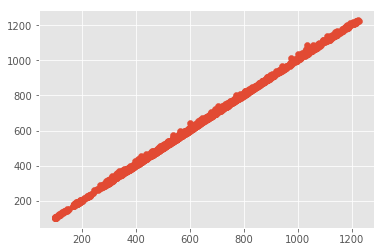

In [390]:
plt.scatter(data['Open'], data['High'])

In [391]:
index = np.arange(3424)

In [392]:
data['index'] = index

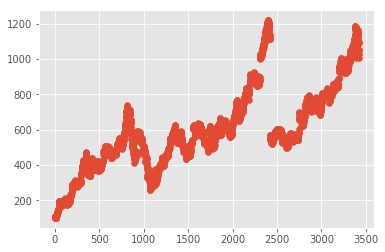

In [393]:
plt.scatter(data['index'], data['Close'], )

In [394]:
from sklearn.linear_model import LinearRegression

In [395]:
data.dropna(inplace=True)

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3423 entries, 2004-08-20 to 2018-03-27
Data columns (total 14 columns):
Open           3423 non-null float64
High           3423 non-null float64
Low            3423 non-null float64
Close          3423 non-null float64
Volume         3423 non-null float64
Ex-Dividend    3423 non-null float64
Split Ratio    3423 non-null float64
Adj. Open      3423 non-null float64
Adj. High      3423 non-null float64
Adj. Low       3423 non-null float64
Adj. Close     3423 non-null float64
Adj. Volume    3423 non-null float64
Change         3423 non-null float64
index          3423 non-null int64
dtypes: float64(13), int64(1)
memory usage: 401.1 KB


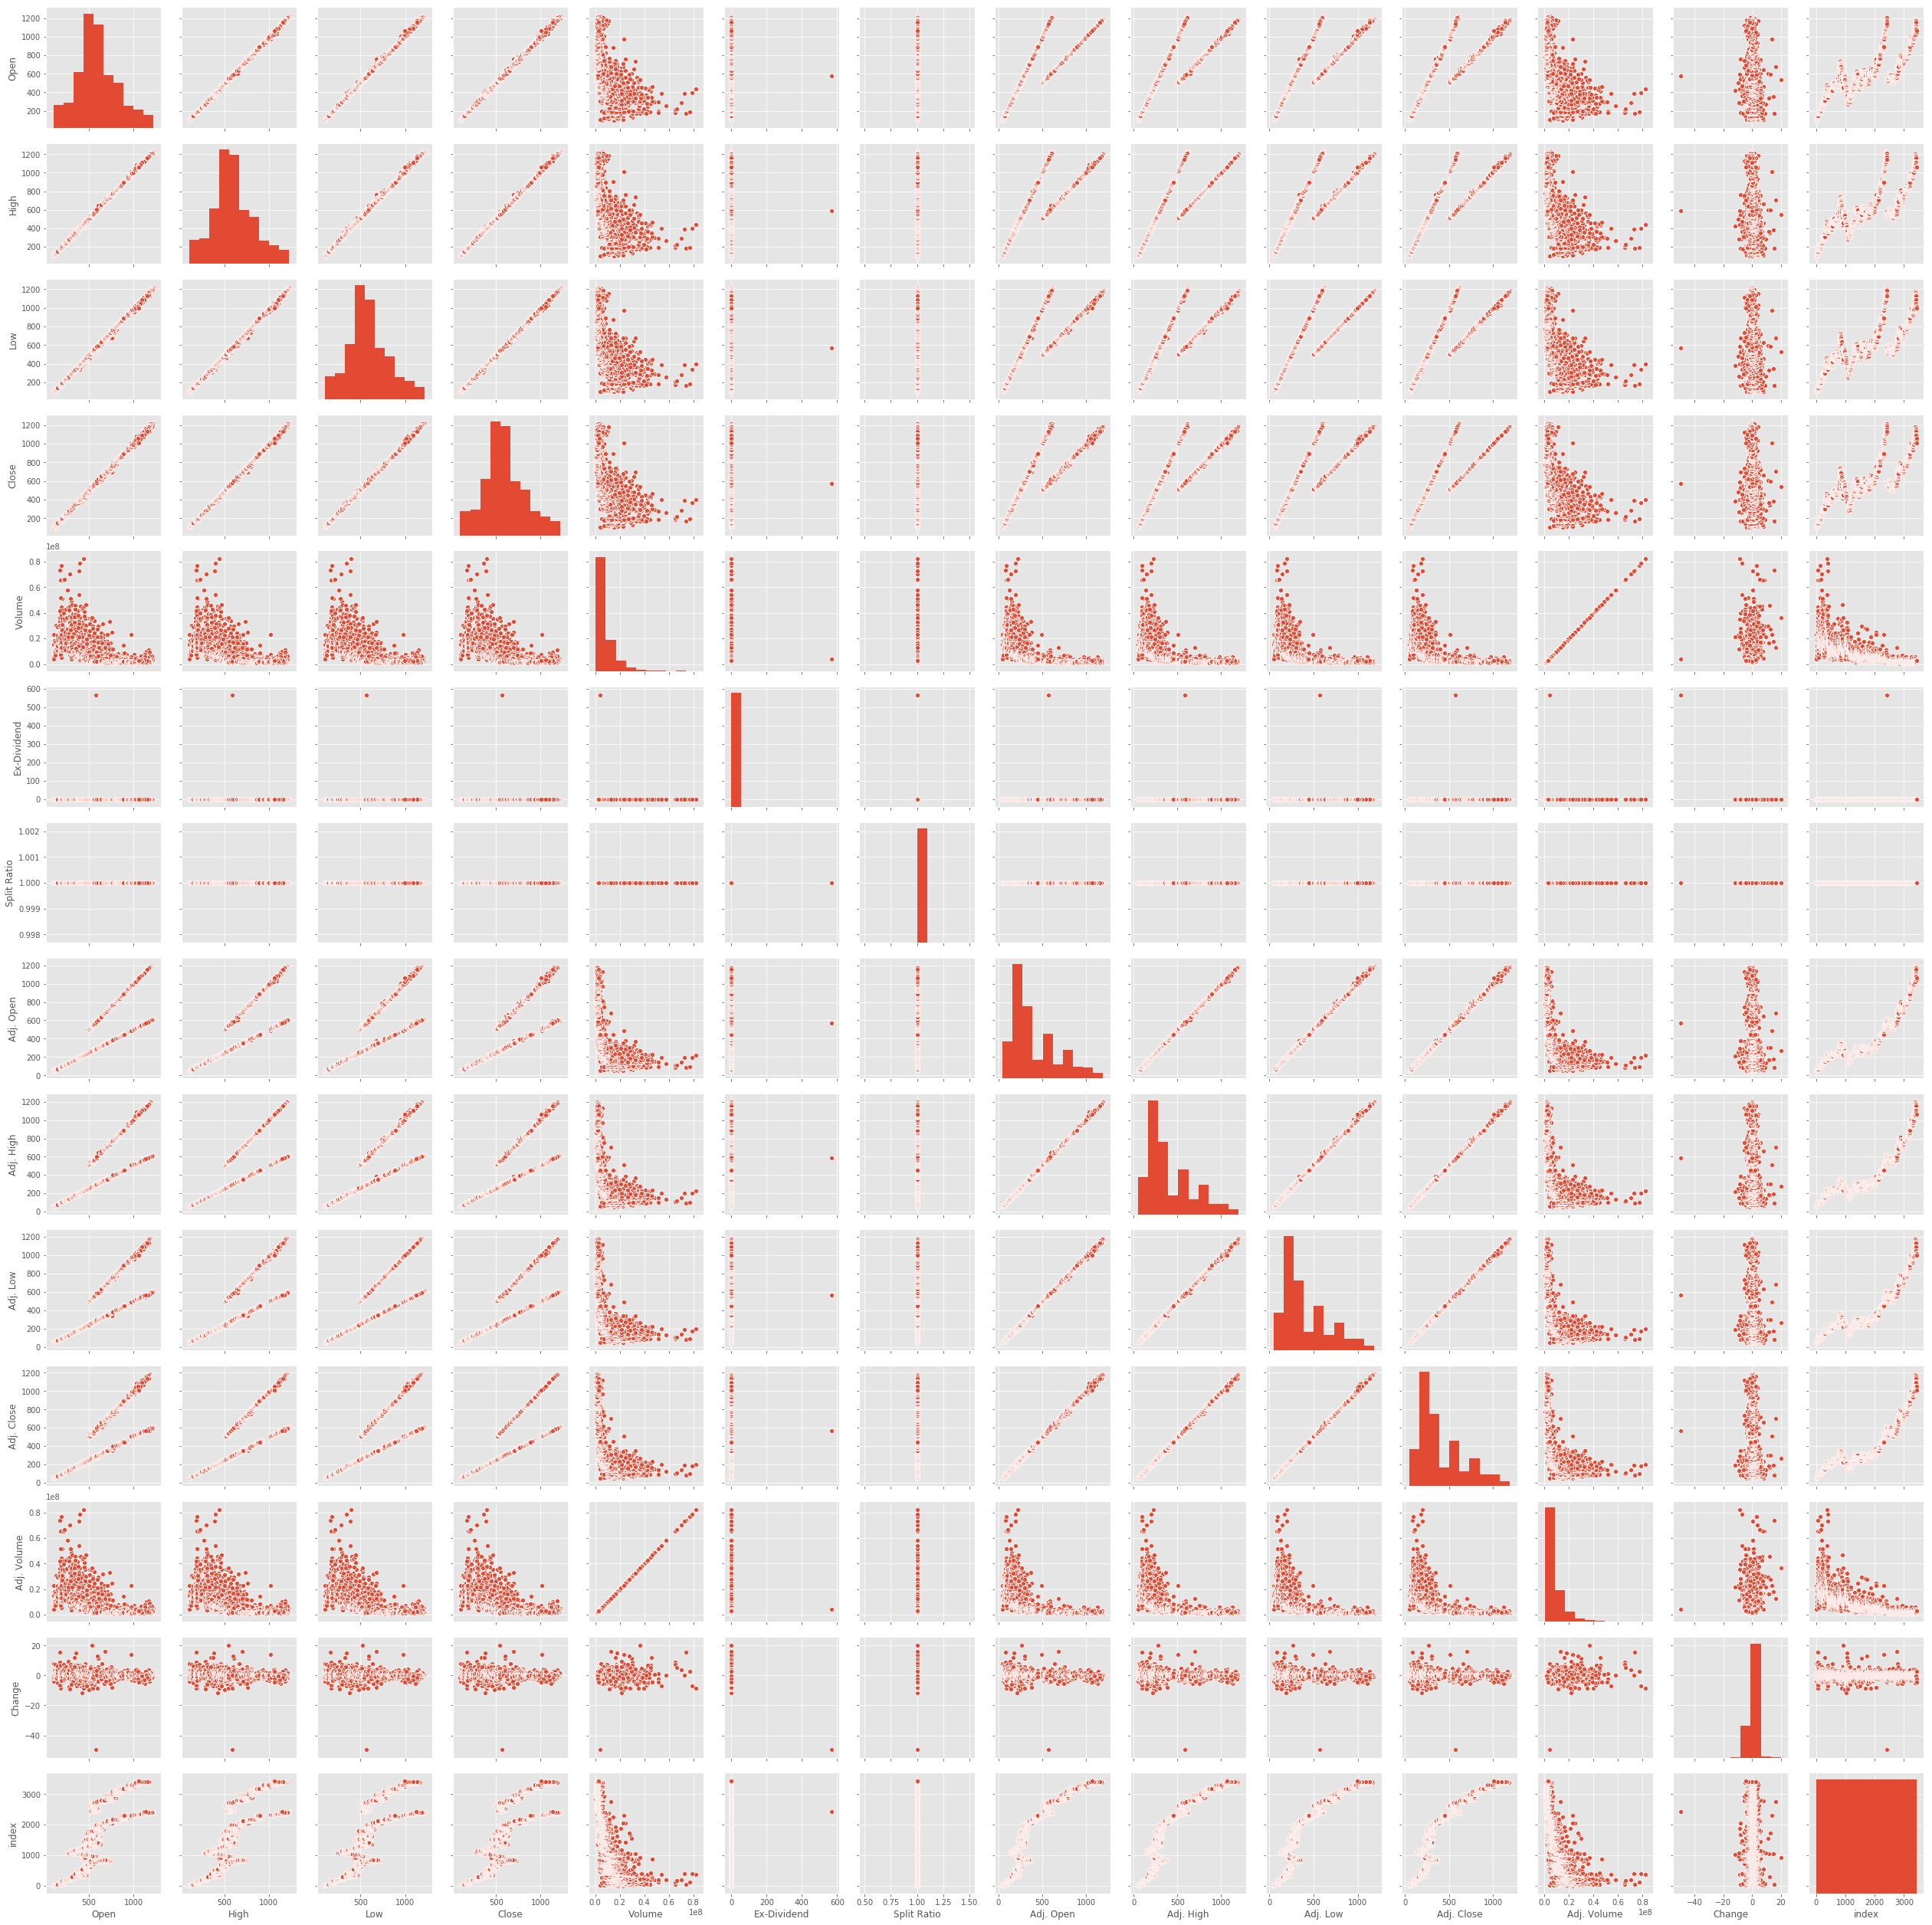

In [397]:
sns.pairplot(data)

In [398]:
data['MA'] = data['Close'].rolling(window=20).mean()

In [399]:
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Change,index,MA
Date,,,,,,,,,,,,,,,
2004-08-20,101.010,109.08,100.50,108.31,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0,7.948373,1,NaN
2004-08-23,110.760,113.48,109.05,109.40,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0,1.006371,2,NaN
2004-08-24,111.240,111.60,103.57,104.87,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0,-4.140768,3,NaN
2004-08-25,104.760,108.00,103.88,106.00,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0,1.077525,4,NaN
2004-08-26,104.950,107.95,104.66,107.91,7094800.0,0.0,1.0,52.637487,54.142132,52.492038,54.122070,7094800.0,1.801887,5,NaN
2004-08-27,108.100,108.62,105.69,106.15,6211700.0,0.0,1.0,54.217364,54.478169,53.008633,53.239345,6211700.0,-1.630989,6,NaN
2004-08-30,105.280,105.49,102.01,102.01,5196700.0,0.0,1.0,52.802998,52.908323,51.162935,51.162935,5196700.0,-3.900141,7,NaN
2004-08-31,102.320,103.71,102.16,102.37,4917800.0,0.0,1.0,51.318415,52.015567,51.238167,51.343492,4917800.0,0.352907,8,NaN
2004-09-01,102.700,102.97,99.67,100.25,9138200.0,0.0,1.0,51.509003,51.644421,49.989312,50.280210,9138200.0,-2.070919,9,NaN


In [400]:
data.dropna(inplace=True)

In [401]:
data['MA']

Date
2004-09-17     106.1380
2004-09-20     106.6905
2004-09-21     107.1125
2004-09-22     107.7880
2004-09-23     108.5290
2004-09-24     109.1250
2004-09-27     109.7305
2004-09-28     110.9730
2004-09-29     112.4085
2004-09-30     113.8760
2004-10-01     115.4295
2004-10-04     117.1820
2004-10-05     119.0215
2004-10-06     120.7605
2004-10-07     122.5875
2004-10-08     124.2075
2004-10-11     125.5955
2004-10-12     126.8910
2004-10-13     128.3360
2004-10-14     129.7375
2004-10-15     131.0685
2004-10-18     132.5585
2004-10-19     134.0635
2004-10-20     135.1690
2004-10-21     136.5970
2004-10-22     139.2270
2004-10-25     142.6840
2004-10-26     145.4310
2004-10-27     148.1755
2004-10-28     151.3605
                ...    
2018-02-13    1125.6540
2018-02-14    1122.3340
2018-02-15    1120.1035
2018-02-16    1117.7035
2018-02-20    1114.6750
2018-02-21    1111.5540
2018-02-22    1108.4845
2018-02-23    1105.7820
2018-02-26    1103.5890
2018-02-27    1100.1405
2018-02-28 

In [402]:
Coke = quandl.get('WIKI/KO')

In [403]:
Coke.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14155 entries, 1962-01-02 to 2018-03-27
Data columns (total 12 columns):
Open           14155 non-null float64
High           14155 non-null float64
Low            14155 non-null float64
Close          14155 non-null float64
Volume         14155 non-null float64
Ex-Dividend    14155 non-null float64
Split Ratio    14155 non-null float64
Adj. Open      14155 non-null float64
Adj. High      14155 non-null float64
Adj. Low       14155 non-null float64
Adj. Close     14155 non-null float64
Adj. Volume    14155 non-null float64
dtypes: float64(12)
memory usage: 1.4 MB


In [404]:
Coke = Coke.reset_index()

In [405]:
Coke.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1962-01-02,101.0,103.75,101.00,101.00,16800.0,0.0,1.0,0.262323,0.269465,0.262323,0.262323,1612800.0
1,1962-01-03,99.5,99.50,97.25,98.75,32800.0,0.0,1.0,0.258427,0.258427,0.252583,0.256479,3148800.0
2,1962-01-04,99.0,100.25,99.00,99.50,17600.0,0.0,1.0,0.257128,0.260375,0.257128,0.258427,1689600.0
3,1962-01-05,99.5,100.75,97.00,97.25,29600.0,0.0,1.0,0.258427,0.261673,0.251934,0.252583,2841600.0
4,1962-01-08,96.5,96.50,94.38,96.25,42400.0,0.0,1.0,0.250635,0.250635,0.245129,0.249986,4070400.0


In [406]:
from sklearn.model_selection import train_test_split

In [407]:
msft = quandl.get("WIKI/MSFT")

In [408]:
msft.reset_index(inplace=True)

In [409]:
msft.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07


In [410]:
from statsmodels.tsa.ar_model import AR 

In [411]:
series=pd.Series(msft['Close'])

Lag: 36
Coefficients: [ 0.15427063  0.9971725  -0.03550037  0.02172575  0.03510229 -0.01280445
 -0.00729138 -0.01918164  0.02338353 -0.01544193 -0.00774372  0.03149228
 -0.01732325  0.01000885 -0.00558479 -0.01121485  0.0084822  -0.02058439
  0.01113533 -0.00616586  0.03881493 -0.03547331 -0.01367698  0.0240186
 -0.0150478   0.02210867 -0.03268011  0.03351869 -0.01805921  0.00515579
  0.01623545 -0.01791585  0.01248407  0.02003858 -0.03624576  0.02077119
 -0.00614487]
predicted=88.902435, expected=89.830000
predicted=88.631528, expected=90.810000
predicted=88.549031, expected=92.660000
predicted=88.509609, expected=92.000000
predicted=88.589128, expected=92.720000
predicted=88.258281, expected=91.490000
predicted=88.257756, expected=91.740000
predicted=88.148450, expected=94.060000
predicted=87.985517, expected=95.420000
predicted=87.962626, expected=94.200000
predicted=87.725936, expected=93.770000
predicted=87.889819, expected=92.850000
predicted=87.866126, expected=93.050000
predict

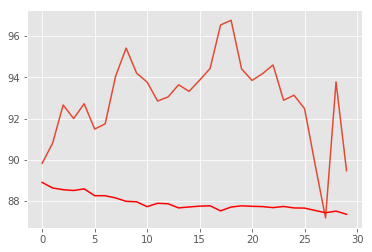

In [413]:
X = series.values
train, test = X[1:len(X)-30], X[len(X)-30:]

model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
